In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)
# Import seaborn
import seaborn as sns

In [3]:
df= pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# Data Exploration

In [4]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [5]:
df.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [6]:
df.shape

(768, 9)

In [7]:
df.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [8]:
df[df['Outcome'] == 1]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
2              8      183             64              0        0  23.3   
4              0      137             40             35      168  43.1   
6              3       78             50             32       88  31.0   
8              2      197             70             45      543  30.5   
..           ...      ...            ...            ...      ...   ...   
755            1      128             88             39      110  36.5   
757            0      123             72              0        0  36.3   
759            6      190             92              0        0  35.5   
761            9      170             74             31        0  44.0   
766            1      126             60              0        0  30.1   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
2                       0.672   32        1  
4                       2.288   33        1  
6                       0.248   26        1  
8                       0.158   53        1  
..                        ...  ...      ...  
755                     1.057   37        1  
757                     0.258   52        1  
759                     0.278   66        1  
761                     0.403   43        1  
766                     0.349   47        1  

[268 rows x 9 columns]

In [9]:
# DiabetesPedigreeFunction --> describes risk of type 2 diabetes greater value, greater risk
# null values check
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.dtypes


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
df[df['Pregnancies']>5].head(20)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
2             8      183             64              0        0  23.3   
7            10      115              0              0        0  35.3   
9             8      125             96              0        0   0.0   
11           10      168             74              0        0  38.0   
12           10      139             80              0        0  27.1   
15            7      100              0              0        0  30.0   
17            7      107             74              0        0  29.6   
21            8       99             84              0        0  35.4   
22            7      196             90              0        0  39.8   
23            9      119             80             35        0  29.0   
24           11      143             94             33      146  36.6   
25           10      125             70             26      115  31.1   
26            7      147             76              0        0  39.4   
28           13      145             82             19      110  22.2   
33            6       92             92              0        0  19.9   
34           10      122             78             31        0  27.6   
36           11      138             76              0        0  33.2   
37            9      102             76             37        0  32.9   
41            7      133             84              0        0  40.2   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
2                      0.672   32        1  
7                      0.134   29        0  
9                      0.232   54        1  
11                     0.537   34        1  
12                     1.441   57        0  
15                     0.484   32        1  
17                     0.254   31        1  
21                     0.388   50        0  
22                     0.451   41        1  
23                     0.263   29        1  
24                     0.254   51        1  
25                     0.205   41        1  
26                     0.257   43        1  
28                     0.245   57        0  
33                     0.188   28        0  
34                     0.512   45        0  
36                     0.420   35        0  
37                     0.665   46        1  
41                     0.696   37        0

#### Data Visualisation


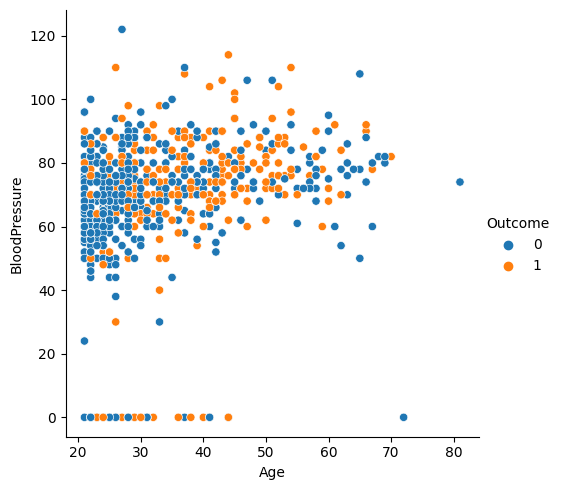

In [12]:
# replot as scatterplot
sns.relplot(x='Age', y='BloodPressure', data=df,hue='Outcome')

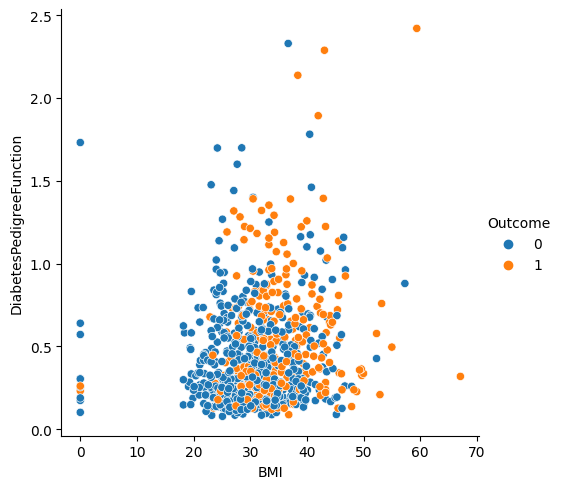

In [13]:
ax=sns.relplot(
    data=df,
    x="BMI", y="DiabetesPedigreeFunction",
    hue="Outcome",
)


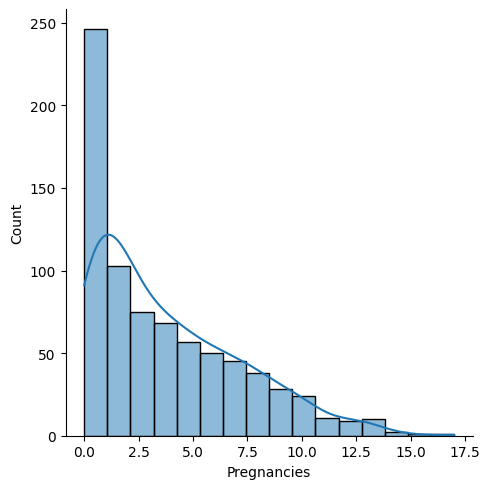

In [14]:
ax=sns.displot(data=df, x="Pregnancies", kde=True,)

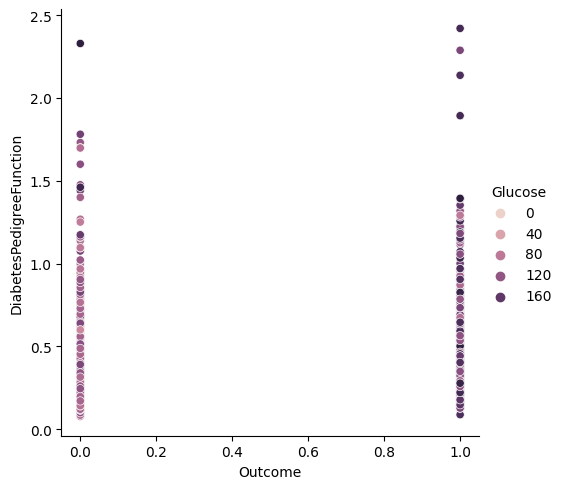

In [15]:
sns.relplot(x='Outcome', y='DiabetesPedigreeFunction', data=df,hue='Glucose')

In [16]:
# input and output
X=df.drop(['Outcome'],axis=1)
y= df["Outcome"]

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [18]:
# Model selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [20]:
# cross validation score
from sklearn.model_selection import cross_val_score

In [21]:
# SVC score 

svc_score= cross_val_score(SVC(), X_train, y_train,cv=10)
print("Average accuracy:", svc_score)

Average accuracy: [0.66666667 0.75925926 0.7962963  0.74074074 0.7962963  0.75925926
 0.66666667 0.79245283 0.77358491 0.73584906]


In [22]:
# Random forest classifier score 

rand_forest_score= cross_val_score(RandomForestClassifier(), X_train, y_train,cv=10)
print("Average accuracy:", rand_forest_score)

Average accuracy: [0.7037037  0.74074074 0.83333333 0.74074074 0.75925926 0.85185185
 0.68518519 0.77358491 0.81132075 0.69811321]


In [23]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [24]:
from sklearn.metrics import accuracy_score

y_pred= model.predict(X_test)

In [25]:
accuracy_match =accuracy_score(y_pred,y_test)
accuracy_match

0.7705627705627706

### Confusion Matrix 


In [26]:
# Create a confusion matrix for the predicted labels and true labels

from sklearn.metrics import confusion_matrix

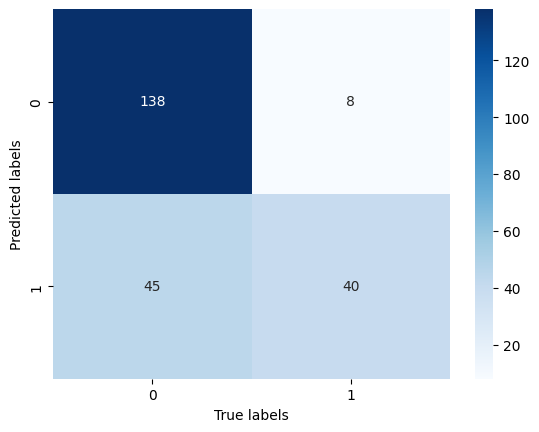

In [27]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.ylabel('Predicted labels')
plt.xlabel('True labels')
plt.show()